In [699]:
import os
import geopandas as gpd
import fiona
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from sklearn.cluster import KMeans
import geopy.distance
pd.options.display.max_columns=60
pd.options.display.max_rows=70
%matplotlib inline

#qeds.themes.mpl_style();

In [700]:
file1 = '/Users/santien/reto_1/doc_subterraneas.kml'
file2 = '/Users/santien/reto_1/doc_superficiales.kml'
file3 = '/Users/santien/reto_1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
file4 = '/Users/santien/reto_1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'
file5 = '/Users/santien/reto_1/Escalas_subterranea.csv'
file6 = '/Users/santien/reto_1/Escalas_superficial.csv'

In [701]:
os.listdir('reto_1')

['Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'doc_subterraneas.kml',
 'doc_superficiales.kml',
 'Escalas_subterranea.csv',
 'Escalas_superficial.csv']

In [702]:
if os.path.exists(file1):
    gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
    df_subterraneas = gpd.read_file(file1, driver='KML')  

In [703]:
if os.path.exists(file2):
    gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
    df_superficiales = gpd.read_file(file2, driver='KML')

In [704]:
df_subterraneas.head()  

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


In [705]:
df_superficiales.head()

,Name,Description,geometry
0,,,POINT Z (-102.33911 22.24730 0.00000)
1,,,POINT Z (-109.84290 22.90473 0.00000)
2,,,POINT Z (-109.86442 22.89880 0.00000)
3,,,POINT Z (-109.88604 22.89609 0.00000)
4,,,POINT Z (-109.89657 22.87694 0.00000)


In [706]:
if os.path.exists(file3):
    df_calidad_agua_sub=pd.read_csv(file3,encoding='latin1')

In [707]:
if os.path.exists(file4):
    df_calidad_agua_sup=pd.read_csv(file4,encoding='latin1')


In [708]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [709]:
df_calidad_agua_sup.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [710]:
if os.path.exists(file5):
    df_escala_sub=pd.read_csv(file5,encoding='latin1')
df_escala_sub.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


In [711]:
if os.path.exists(file6):
    df_escala_sup=pd.read_csv(file6,encoding='latin1')
df_escala_sup.head()

,CALIDAD DEL AGUA PARA TOXICIDAD,CRITERIO,DESCRIPCION
0,No t¢xico,TOX menor a 1,Agua no contaminada.Toxicidad no detectable.
1,Toxicidad baja,TOX mayor o igual a 1 y menor o igual a 1.33,Toxicidad baja
2,Toxicidad moderada,TOX mayor de 1.33 y menor a 5,Toxicidad moderada
3,Toxicidad alta,TOX mayor o igual a 5,Toxicidad alta
4,CALIDAD DEL AGUA PARA SST,CRITERIO,DESCRIPCION


In [712]:
#mapa mundial
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


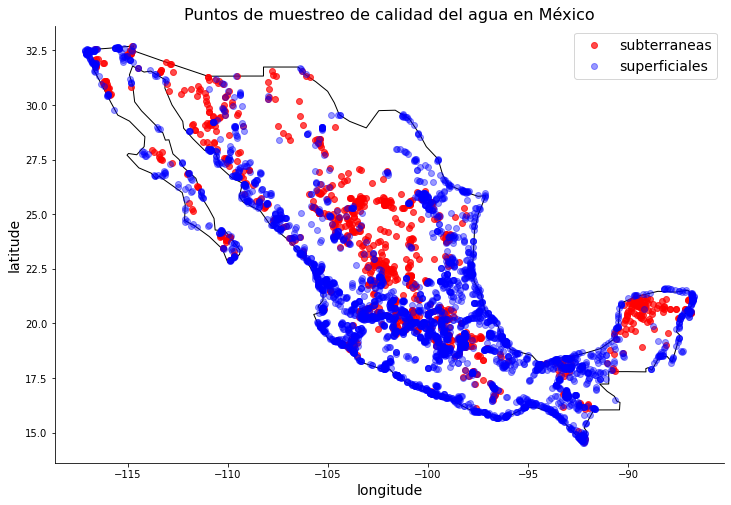

In [713]:
fig, gax = plt.subplots(figsize=(12,12))
# Seleccionar solo México
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# Locaciones geograficas de interes
df_subterraneas.plot(ax=gax, color='red', alpha = 0.7,legend = True)
df_superficiales.plot(ax=gax, color='blue', alpha = 0.4,legend = True)
#centers_df.plot(ax=gax,color='green')

gax.set_xlabel('longitude',fontsize=14)
gax.set_ylabel('latitude',fontsize=14)
gax.set_title('Puntos de muestreo de calidad del agua en México',fontsize=16)
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.legend(['subterraneas','superficiales'],fontsize=14)
plt.show()

# Exploración de los datos

In [714]:
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [715]:
df_calidad_agua_sub.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [716]:
df_calidad_agua_sub.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLAVE,1068,1068,DLDUR684,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIO,1068,1066,POZO VILLA UNION,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORGANISMO_DE_CUENCA,1068,13,CUENCAS CENTRALES DEL NORTE,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTADO,1068,32,DURANGO,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUNICIPIO,1068,452,LA PAZ,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACUIFERO,1068,273,PENINSULA DE YUCATAN,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SUBTIPO,1068,8,POZO,1039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUD,1068.0,NaN,NaN,NaN,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.86412
LATITUD,1068.0,NaN,NaN,NaN,23.163618,3.88767,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


In [717]:
df_calidad_agua_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [718]:
# eliminar columna con puros nulls
df_calidad_agua_sub.drop('SDT_mg/L',axis=1,inplace=True)

# Muchas columnas tipo objeto, pero con datos númericos

In [719]:
[(item,df_calidad_agua_sub[item].dtype, df_calidad_agua_sub[item].isna().sum(),list(df_calidad_agua_sub[item].head(2))) \
 for item in df_calidad_agua_sub.columns]

[('CLAVE', dtype('O'), 0, ['DLAGU6', 'DLAGU6516']),
 ('SITIO', dtype('O'), 0, ['POZO SAN GIL', 'POZO R013 CAÑADA HONDA']),
 ('ORGANISMO_DE_CUENCA',
  dtype('O'),
  0,
  ['LERMA SANTIAGO PACIFICO', 'LERMA SANTIAGO PACIFICO']),
 ('ESTADO', dtype('O'), 0, ['AGUASCALIENTES', 'AGUASCALIENTES']),
 ('MUNICIPIO', dtype('O'), 0, ['ASIENTOS', 'AGUASCALIENTES']),
 ('ACUIFERO', dtype('O'), 0, ['VALLE DE CHICALOTE', 'VALLE DE CHICALOTE']),
 ('SUBTIPO', dtype('O'), 0, ['POZO', 'POZO']),
 ('LONGITUD', dtype('float64'), 0, [-102.0221, -102.20075]),
 ('LATITUD', dtype('float64'), 0, [22.20887, 21.99958]),
 ('PERIODO', dtype('int64'), 0, [2020, 2020]),
 ('ALC_mg/L', dtype('float64'), 4, [229.99, 231.99]),
 ('CALIDAD_ALC', dtype('O'), 4, ['Alta', 'Alta']),
 ('CONDUCT_mS/cm', dtype('float64'), 6, [940.0, 608.0]),
 ('CALIDAD_CONDUC',
  dtype('O'),
  6,
  ['Permisible para riego', 'Buena para riego']),
 ('SDT_M_mg/L', dtype('O'), 2, ['603.6', '445.4']),
 ('CALIDAD_SDT_ra',
  dtype('O'),
  2,
  ['Cultivos se

In [720]:
df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].head(3)

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L
0,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891
1,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025
2,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025


In [721]:
def convert_to_numeric(item):
    if type(item)==str:
        item=item.strip('<')
    return float(item)    

In [722]:
col_a_numeric=[item for item in df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].columns if "CALIDAD" not in item]

In [723]:
for col in col_a_numeric:
    df_calidad_agua_sub[col]=df_calidad_agua_sub[col].apply(convert_to_numeric)

# Identificar cantidad de niveles de columnas de calidad, para identificar niveles de mapeo ordinal

In [724]:
[(item,df_calidad_agua_sub[item].value_counts(),len(df_calidad_agua_sub[item].value_counts())) for item in df_calidad_agua_sub.columns if "CALIDAD" in item]

[('CALIDAD_ALC',
  Alta                    794
  Media                   187
  Indeseable como FAAP     59
  Baja                     24
  Name: CALIDAD_ALC, dtype: int64,
  4),
 ('CALIDAD_CONDUC',
  Permisible para riego    460
  Buena para riego         434
  Dudosa para riego         72
  Indeseable para riego     51
  Excelente para riego      45
  Name: CALIDAD_CONDUC, dtype: int64,
  5),
 ('CALIDAD_SDT_ra',
  Excelente para riego            491
  Cultivos sensibles              343
  Cultivos con manejo especial    161
  Cultivos tolerantes              64
  Indeseable para riego             7
  Name: CALIDAD_SDT_ra, dtype: int64,
  5),
 ('CALIDAD_SDT_salin',
  Potable - Dulce         834
  Ligeramente salobres    161
  Salobres                 68
  Salinas                   3
  Name: CALIDAD_SDT_salin, dtype: int64,
  4),
 ('CALIDAD_FLUO',
  Baja                434
  Potable - Optima    226
  Media               216
  Alta                192
  Name: CALIDAD_FLUO, dtype: int64,
 

## Revisar faltantes y cambiar a ordinales las variables apropiadas.
### Donde sea posible la imputación sera hecha tomando en cuenta la información de su   columna 
###  acompañante. (Varias columnas vienen en pares, 1 con datos númericos y la otra con una clasifi-
### cación ordinal)
### Proceso lo voy hacer manual para poder identificar correctamente relaciones de ordinalidad

* ALC_mg/L','CALIDAD_ALC'

In [725]:
df_calidad_agua_sub[['ALC_mg/L','CALIDAD_ALC']].loc[df_calidad_agua_sub['ALC_mg/L'].isna()]

,ALC_mg/L,CALIDAD_ALC
406,NaN,NaN
407,NaN,NaN
722,NaN,NaN
861,NaN,NaN


In [726]:
# En este caso imputar por mediana
df_calidad_agua_sub['ALC_mg/L'].fillna(df_calidad_agua_sub['ALC_mg/L'].median(), inplace=True)
df_calidad_agua_sub[['ALC_mg/L','CALIDAD_ALC']].loc[df_calidad_agua_sub['ALC_mg/L'].isna()]

,ALC_mg/L,CALIDAD_ALC


In [727]:
# En este caso imputar por moda
df_calidad_agua_sub['CALIDAD_ALC'].value_counts()

Alta                    794
Media                   187
Indeseable como FAAP     59
Baja                     24
Name: CALIDAD_ALC, dtype: int64

In [728]:
df_calidad_agua_sub['CALIDAD_ALC'].fillna('Alta', inplace=True)

In [729]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_ALC']=df_calidad_agua_sub['CALIDAD_ALC'].map({'Indeseable como FAAP':0,'Baja':1,'Media':2,'Alta':3})
df_calidad_agua_sub['CALIDAD_ALC'].value_counts()

3    798
2    187
0     59
1     24
Name: CALIDAD_ALC, dtype: int64

In [730]:
df_calidad_agua_sub[['ALC_mg/L','CALIDAD_ALC']].loc[df_calidad_agua_sub['CALIDAD_ALC'].isna()]

,ALC_mg/L,CALIDAD_ALC


* CONDUCT_mS/cm', 'CALIDAD_CONDUC'

In [731]:
df_calidad_agua_sub[['CONDUCT_mS/cm','CALIDAD_CONDUC']].loc[df_calidad_agua_sub['CONDUCT_mS/cm'].isna()]

,CONDUCT_mS/cm,CALIDAD_CONDUC
18,NaN,NaN
281,NaN,NaN
293,NaN,NaN
616,NaN,NaN
891,NaN,NaN
906,NaN,NaN


In [732]:
# En este caso imputar por mediana
df_calidad_agua_sub['CONDUCT_mS/cm'].fillna(df_calidad_agua_sub['CONDUCT_mS/cm'].median(), inplace=True)
df_calidad_agua_sub[['CONDUCT_mS/cm','CALIDAD_CONDUC']].loc[df_calidad_agua_sub['CONDUCT_mS/cm'].isna()]

,CONDUCT_mS/cm,CALIDAD_CONDUC


In [733]:
# En este caso imputar por moda
df_calidad_agua_sub['CALIDAD_CONDUC'].value_counts()

Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [734]:
df_calidad_agua_sub['CALIDAD_CONDUC'].fillna(df_calidad_agua_sub['CALIDAD_CONDUC'].mode()[0],inplace=True)
df_calidad_agua_sub[['CONDUCT_mS/cm','CALIDAD_CONDUC']].loc[df_calidad_agua_sub['CALIDAD_CONDUC'].isna()]

,CONDUCT_mS/cm,CALIDAD_CONDUC


In [735]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_CONDUC']=df_calidad_agua_sub['CALIDAD_CONDUC'].map({'Indeseable para riego':0,'Dudosa para riego':1,'Permisible para riego':2,'Buena para riego':3,\
                                                                                'Excelente para riego':4})
df_calidad_agua_sub['CALIDAD_CONDUC'].value_counts()

2    466
3    434
1     72
0     51
4     45
Name: CALIDAD_CONDUC, dtype: int64

## Variables
* 'SDT_M_mg/L', 'CALIDAD_SDT_ra','CALIDAD_SDT_salin'

In [736]:
df_calidad_agua_sub[['SDT_M_mg/L','CALIDAD_SDT_ra','CALIDAD_SDT_salin']].loc[df_calidad_agua_sub['SDT_M_mg/L'].isna()]

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin
175,NaN,NaN,NaN
677,NaN,NaN,NaN


In [737]:
# En este caso imputar por media
df_calidad_agua_sub['SDT_M_mg/L'].fillna(df_calidad_agua_sub['SDT_M_mg/L'].median(), inplace=True)
df_calidad_agua_sub[['SDT_M_mg/L','CALIDAD_SDT_ra','CALIDAD_SDT_salin']].loc[df_calidad_agua_sub['SDT_M_mg/L'].isna()]

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin


In [738]:
# En este caso imputar por moda
df_calidad_agua_sub['CALIDAD_SDT_ra'].value_counts()

Excelente para riego            491
Cultivos sensibles              343
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [739]:
df_calidad_agua_sub['CALIDAD_SDT_ra'].fillna(df_calidad_agua_sub['CALIDAD_SDT_ra'].mode()[0],inplace=True)
df_calidad_agua_sub[['SDT_M_mg/L','CALIDAD_SDT_ra','CALIDAD_SDT_salin']].loc[df_calidad_agua_sub['SDT_M_mg/L'].isna()]

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin


In [740]:
df_calidad_agua_sub.groupby('CALIDAD_SDT_ra')['SDT_M_mg/L'].mean()

CALIDAD_SDT_ra
Cultivos con manejo especial     1384.498965
Cultivos sensibles                712.067842
Cultivos tolerantes              2760.687498
Excelente para riego              328.676268
Indeseable para riego           21497.152386
Name: SDT_M_mg/L, dtype: float64

In [741]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_SDT_ra']=df_calidad_agua_sub['CALIDAD_SDT_ra'].map({'Indeseable para riego':0,'Cultivos tolerantes':1,'Cultivos con manejo especial':2,'Cultivos sensibles':3,\
                                                                                'Excelente para riego':4})
df_calidad_agua_sub['CALIDAD_SDT_ra'].value_counts()

4    493
3    343
2    161
1     64
0      7
Name: CALIDAD_SDT_ra, dtype: int64

In [742]:
# En este caso imputar por moda
df_calidad_agua_sub['CALIDAD_SDT_salin'].value_counts()

Potable - Dulce         834
Ligeramente salobres    161
Salobres                 68
Salinas                   3
Name: CALIDAD_SDT_salin, dtype: int64

In [743]:
df_calidad_agua_sub.groupby('CALIDAD_SDT_salin')['SDT_M_mg/L'].mean()

CALIDAD_SDT_salin
Ligeramente salobres     1384.498965
Potable - Dulce           485.822386
Salinas                 39860.600000
Salobres                 3052.680391
Name: SDT_M_mg/L, dtype: float64

In [744]:
df_calidad_agua_sub['CALIDAD_SDT_salin'].fillna(df_calidad_agua_sub['CALIDAD_SDT_salin'].mode()[0],inplace=True)
df_calidad_agua_sub[['SDT_M_mg/L','CALIDAD_SDT_ra','CALIDAD_SDT_salin']].loc[df_calidad_agua_sub['SDT_M_mg/L'].isna()]

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin


In [745]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_SDT_salin']=df_calidad_agua_sub['CALIDAD_SDT_salin'].map({'Salinas':0,'Salobres':1,'Ligeramente salobres':2,'Potable - Dulce':3})            
df_calidad_agua_sub['CALIDAD_SDT_salin'].value_counts()

3    836
2    161
1     68
0      3
Name: CALIDAD_SDT_salin, dtype: int64

* ('FLUORUROS_mg/L', dtype('O'), 0, ['0.9766', '0.9298']),
 ('CALIDAD_FLUO', dtype('O'), 0, ['Potable - Optima', 'Potable - Optima']),

In [746]:
df_calidad_agua_sub['CALIDAD_FLUO'].value_counts()

Baja                434
Potable - Optima    226
Media               216
Alta                192
Name: CALIDAD_FLUO, dtype: int64

In [747]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_FLUO']=df_calidad_agua_sub['CALIDAD_FLUO'].map({'Baja':0,'Media':1,'Alta':2,'Potable - Optima':3})            
df_calidad_agua_sub['CALIDAD_FLUO'].value_counts()

0    434
3    226
1    216
2    192
Name: CALIDAD_FLUO, dtype: int64

* ('DUR_mg/L', dtype('O'), 1, ['213.732', '185.0514']),
 ('CALIDAD_DUR', dtype('O'), 1, ['Potable - Dura', 'Potable - Dura']),

In [748]:
df_calidad_agua_sub[['DUR_mg/L','CALIDAD_DUR']].loc[df_calidad_agua_sub['DUR_mg/L'].isna()]

,DUR_mg/L,CALIDAD_DUR
635,NaN,NaN


In [749]:
# En este caso imputar por media
df_calidad_agua_sub['DUR_mg/L'].fillna(df_calidad_agua_sub['DUR_mg/L'].median(), inplace=True)
df_calidad_agua_sub[['DUR_mg/L','CALIDAD_DUR']].loc[df_calidad_agua_sub['DUR_mg/L'].isna()]

,DUR_mg/L,CALIDAD_DUR


In [750]:
# imputar moda
# En este caso imputar por moda
df_calidad_agua_sub['CALIDAD_DUR'].value_counts()

Potable - Dura                                       577
Muy dura e indeseable usos industrial y domestico    226
Potable - Moderadamente suave                        168
Potable - Suave                                       96
Name: CALIDAD_DUR, dtype: int64

In [751]:
df_calidad_agua_sub['CALIDAD_DUR'].fillna(df_calidad_agua_sub['CALIDAD_DUR'].mode()[0],inplace=True)
df_calidad_agua_sub[['DUR_mg/L','CALIDAD_DUR']].loc[df_calidad_agua_sub['DUR_mg/L'].isna()]

,DUR_mg/L,CALIDAD_DUR


In [752]:
df_calidad_agua_sub.groupby('CALIDAD_DUR')['DUR_mg/L'].mean()

CALIDAD_DUR
Muy dura e indeseable usos industrial y domestico    864.993065
Potable - Dura                                       271.788263
Potable - Moderadamente suave                         91.267915
Potable - Suave                                       37.293761
Name: DUR_mg/L, dtype: float64

In [753]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_DUR']=df_calidad_agua_sub['CALIDAD_DUR'].map({'Muy dura e indeseable usos industrial y domestico':0,'Potable - Dura':1,'Potable - Moderadamente suave':2,'Potable - Suave':3})            
df_calidad_agua_sub['CALIDAD_DUR'].value_counts()

1    578
0    226
2    168
3     96
Name: CALIDAD_DUR, dtype: int64

* ('COLI_FEC_NMP/100_mL', dtype('O'), 0, ['<1.1', '<1.1']),
 ('CALIDAD_COLI_FEC',
  dtype('O'),
  0,

In [754]:
df_calidad_agua_sub['COLI_FEC_NMP/100_mL'].head()

0      1.1
1      1.1
2      1.1
3      1.1
4    291.0
Name: COLI_FEC_NMP/100_mL, dtype: float64

In [755]:
df_calidad_agua_sub['CALIDAD_COLI_FEC'].value_counts()

Potable - Excelente        739
Buena calidad              208
Aceptable                   60
Contaminada                 49
Fuertemente contaminada     12
Name: CALIDAD_COLI_FEC, dtype: int64

In [756]:
df_calidad_agua_sub.groupby('CALIDAD_COLI_FEC')['COLI_FEC_NMP/100_mL'].mean().sort_values(ascending=False)

CALIDAD_COLI_FEC
Fuertemente contaminada    17686.500000
Contaminada                 2699.367347
Aceptable                    406.533333
Buena calidad                 47.826923
Potable - Excelente            1.105142
Name: COLI_FEC_NMP/100_mL, dtype: float64

In [757]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_COLI_FEC']=df_calidad_agua_sub['CALIDAD_COLI_FEC'].map({'Fuertemente contaminada':0,'Contaminada':1,'Aceptable':2,'Buena calidad':3,\
                                                                                    'Potable - Excelente':4})            
df_calidad_agua_sub['CALIDAD_COLI_FEC'].value_counts()

4    739
3    208
2     60
1     49
0     12
Name: CALIDAD_COLI_FEC, dtype: int64

* ('N_NO3_mg/L', dtype('O'), 1, ['4.184656', '5.75011']),
 ('CALIDAD_N_NO3',
  dtype('O'),
  1,
  ['Potable - Excelente', 'Potable - Buena calidad']),

In [758]:
df_calidad_agua_sub[['N_NO3_mg/L','CALIDAD_N_NO3']].loc[df_calidad_agua_sub['N_NO3_mg/L'].isna()]

,N_NO3_mg/L,CALIDAD_N_NO3
234,NaN,NaN


In [759]:
# En este caso imputar por mediana
df_calidad_agua_sub['N_NO3_mg/L'].fillna(df_calidad_agua_sub['N_NO3_mg/L'].median(), inplace=True)
df_calidad_agua_sub[['N_NO3_mg/L','CALIDAD_N_NO3']].loc[df_calidad_agua_sub['N_NO3_mg/L'].isna()]

,N_NO3_mg/L,CALIDAD_N_NO3


In [760]:
# En este caso imputar por moda
df_calidad_agua_sub['CALIDAD_N_NO3'].value_counts()

Potable - Excelente        788
Potable - Buena calidad    197
No apta como FAAP           82
Name: CALIDAD_N_NO3, dtype: int64

In [761]:
df_calidad_agua_sub['CALIDAD_N_NO3'].fillna(df_calidad_agua_sub['CALIDAD_N_NO3'].mode()[0],inplace=True)
df_calidad_agua_sub[['N_NO3_mg/L','CALIDAD_N_NO3']].loc[df_calidad_agua_sub['CALIDAD_N_NO3'].isna()]

,N_NO3_mg/L,CALIDAD_N_NO3


In [762]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_N_NO3']=df_calidad_agua_sub['CALIDAD_N_NO3'].map({'No apta como FAAP':0,'Potable - Buena calidad':1,'Potable - Excelente':2})
df_calidad_agua_sub['CALIDAD_N_NO3'].value_counts()

2    789
1    197
0     82
Name: CALIDAD_N_NO3, dtype: int64

* ('AS_TOT_mg/L', dtype('O'), 0, ['0.0161', '0.0134']),
 ('CALIDAD_AS', dtype('O'), 0, ['Apta como FAAP', 'Apta como FAAP']),

In [763]:
df_calidad_agua_sub['AS_TOT_mg/L'].head()

0    0.0161
1    0.0134
2    0.0370
3    0.0154
4    0.0100
Name: AS_TOT_mg/L, dtype: float64

In [764]:
df_calidad_agua_sub["CALIDAD_AS"].value_counts()

Potable - Excelente    816
No apta como FAAP      127
Apta como FAAP         125
Name: CALIDAD_AS, dtype: int64

In [765]:
map_AS= {'No apta como FAAP':0,'Apta como FAAP':1,'Potable - Excelente':2}

In [766]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_AS']=df_calidad_agua_sub['CALIDAD_AS'].map(map_AS)
df_calidad_agua_sub['CALIDAD_AS'].value_counts()

2    816
0    127
1    125
Name: CALIDAD_AS, dtype: int64

* ('CD_TOT_mg/L', dtype('O'), 0, ['<0.003', '<0.003']),
 ('CALIDAD_CD', dtype('O'), 0, ['Potable - Excelente', 'Potable - Excelente']),


In [783]:
df_calidad_agua_sub['CD_TOT_mg/L'].head()

0    0.003
1    0.003
2    0.003
3    0.003
4    0.003
Name: CD_TOT_mg/L, dtype: float64

In [784]:
df_calidad_agua_sub["CALIDAD_CD"].value_counts()

Potable - Excelente    1066
No apta como FAAP         2
Name: CALIDAD_CD, dtype: int64

In [785]:
map_CD= {'No apta como FAAP':0,'Apta como FAAP':1,'Potable - Excelente':2}

In [786]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_CD']=df_calidad_agua_sub['CALIDAD_CD'].map(map_CD)
df_calidad_agua_sub['CALIDAD_CD'].value_counts()

2    1066
0       2
Name: CALIDAD_CD, dtype: int64

* ('HG_TOT_mg/L', dtype('O'), 0, ['<0.0005', '<0.0005']),
 ('CALIDAD_HG', dtype('O'), 0, ['Potable - Excelente', 'Potable - Excelente']),
 ('PB_TOT_mg/L', dtype('O'), 0, ['<0.005', '<0.005']),
 ('CALIDAD_PB', dtype('O'), 0, ['Potable - Excelente', 'Potable - Excelente']),
 ('MN_TOT_mg/L', dtype('O'), 0, ['<0.0015', '<0.0015']),
 ('CALIDAD_MN', dtype('O'), 0, ['Potable - Excelente', 'Potable - Excelente']),
 ('FE_TOT_mg/L', dtype('O'), 0, ['0.0891', '<0.025']),
 ('CALIDAD_FE', dtype('O'), 0, ['Potable - Excelente', 'Potable - Excelente']),

In [787]:
df_calidad_agua_sub['HG_TOT_mg/L'].head()

0    0.0005
1    0.0005
2    0.0005
3    0.0005
4    0.0005
Name: HG_TOT_mg/L, dtype: float64

In [788]:
df_calidad_agua_sub["CALIDAD_HG"].value_counts()

Potable - Excelente    1067
No apta como FAAP         1
Name: CALIDAD_HG, dtype: int64

In [789]:
map_HG= {'No apta como FAAP':0,'Potable - Excelente':1}

In [790]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_HG']=df_calidad_agua_sub['CALIDAD_HG'].map(map_HG)
df_calidad_agua_sub['CALIDAD_HG'].value_counts()

1    1067
0       1
Name: CALIDAD_HG, dtype: int64

In [791]:
df_calidad_agua_sub['PB_TOT_mg/L'].head()

0    0.005
1    0.005
2    0.005
3    0.005
4    0.005
Name: PB_TOT_mg/L, dtype: float64

In [792]:
df_calidad_agua_sub["CALIDAD_PB"].value_counts()

Potable - Excelente    1056
No apta como FAAP        12
Name: CALIDAD_PB, dtype: int64

In [793]:
map_PB= {'No apta como FAAP':0,'Potable - Excelente':1}

In [794]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_PB']=df_calidad_agua_sub['CALIDAD_PB'].map(map_PB)
df_calidad_agua_sub['CALIDAD_PB'].value_counts()

1    1056
0      12
Name: CALIDAD_PB, dtype: int64

In [796]:
df_calidad_agua_sub['MN_TOT_mg/L'].head()

0    0.0015
1    0.0015
2    0.0015
3    0.0015
4    0.0015
Name: MN_TOT_mg/L, dtype: float64

In [797]:
df_calidad_agua_sub["CALIDAD_MN"].value_counts()

Potable - Excelente                                  982
Puede afectar la salud                                50
Sin efectos en la salud - Puede dar color al agua     36
Name: CALIDAD_MN, dtype: int64

In [798]:
map_MN= {'Puede afectar la salud':0,'Sin efectos en la salud - Puede dar color al agua':1,'Potable - Excelente':2}

In [799]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_MN']=df_calidad_agua_sub['CALIDAD_MN'].map(map_MN)
df_calidad_agua_sub['CALIDAD_MN'].value_counts()

2    982
0     50
1     36
Name: CALIDAD_MN, dtype: int64

In [800]:
df_calidad_agua_sub['FE_TOT_mg/L'].head()

0    0.0891
1    0.0250
2    0.0250
3    0.0250
4    0.0250
Name: FE_TOT_mg/L, dtype: float64

In [801]:
df_calidad_agua_sub["CALIDAD_FE"].value_counts()

Potable - Excelente                                  932
Sin efectos en la salud - Puede dar color al agua    136
Name: CALIDAD_FE, dtype: int64

In [802]:
map_FE= {'Sin efectos en la salud - Puede dar color al agua':0,'Potable - Excelente':1}

In [803]:
# Asignar mapa ordinal
df_calidad_agua_sub['CALIDAD_FE']=df_calidad_agua_sub['CALIDAD_FE'].map(map_FE)
df_calidad_agua_sub['CALIDAD_FE'].value_counts()

1    932
0    136
Name: CALIDAD_FE, dtype: int64

* ('SEMAFORO', dtype('O'), 0, ['Verde', 'Verde']),

In [804]:
map_SEMAFORO= {'Rojo':0,'Amarillo':1,'Verde':2}

In [805]:
# Asignar mapa ordinal
df_calidad_agua_sub['SEMAFORO']=df_calidad_agua_sub['SEMAFORO'].map(map_SEMAFORO)
df_calidad_agua_sub['SEMAFORO'].value_counts()

2    434
0    387
1    247
Name: SEMAFORO, dtype: int64

 * ('CONTAMINANTES', dtype('O'), 434, [nan, nan]),

In [824]:
df_calidad_agua_sub['CONTAMINANTES'].isna().sum()

434

In [811]:
df_calidad_agua_sub.groupby('SEMAFORO')['CONTAMINANTES'].count()

SEMAFORO
0    387
1    247
2      0
Name: CONTAMINANTES, dtype: int64

In [823]:
df_calidad_agua_sub.loc[df_calidad_agua_sub['CONTAMINANTES'].isna(),'SEMAFORO'].value_counts()

2    434
Name: SEMAFORO, dtype: int64

In [825]:
# imputar con texto "Ninguno"
df_calidad_agua_sub['CONTAMINANTES'].fillna('Ninguno',inplace=True)
df_calidad_agua_sub['CONTAMINANTES'].isna().sum()

0

In [827]:
# Posiblemente hay que limpiar y aplicar OE a contaminantes, por el momento dejar asi

In [771]:
np.random.random_sample(10)*.0015

array([8.52066842e-04, 1.38839496e-03, 1.06554087e-04, 1.30693950e-04,
       3.03275962e-05, 1.24892977e-03, 1.16723513e-03, 1.30501822e-03,
       1.46792751e-03, 1.19873785e-03])

In [772]:
def convert_to_numeric_1(item,seed):
    #np.random.seed(seed)
    if type(item)==str:
        item=item.strip('<')
        np.random.seed(seed)
        item = np.random.random_sample()*float(item)
        #np.random.seed(seed)
        seed+=1
        #np.random.seed(seed)
        
    return float(item)

In [773]:
df_calidad_agua_sub.loc[:,'SDT_M_mg/L':'FE_TOT_mg/L'].head(3)

,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L
0,603.6,3,3,0.9766,3,213.7320,1,1.1,4,4.184656,2,0.0161,NaN,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891
1,445.4,4,3,0.9298,3,185.0514,1,1.1,4,5.750110,1,0.0134,NaN,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250
2,342.0,4,3,1.8045,2,120.7190,1,1.1,4,1.449803,2,0.0370,NaN,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250


In [775]:
np.random.random_sample(1)

array([0.46147936])

CALIDAD_ALC
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ALC_mg/L, dtype: object

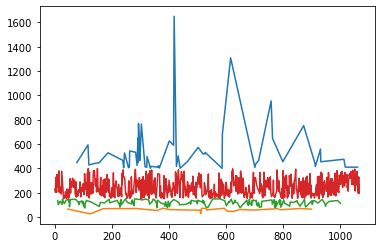

In [826]:
df_calidad_agua_sub.groupby('CALIDAD_ALC')['ALC_mg/L'].plot()